In [53]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from prophet import Prophet
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [27]:
#Load City Data
city_zvhi_df = pd.read_csv('/Users/timwillard/Desktop/group3-project2-ml/tw/Zillow/City_zhvi.csv')

In [28]:
#Filter for Denver
denver_data = city_zvhi_df[city_zvhi_df['RegionName'] == 'Denver']

In [29]:
#Extract only time series data
# Transpose to have dates as index
denver_time_series = denver_data.iloc[:, 8:].T
print(denver_time_series)

                    23             2761           3610           11703  \
2000-01-31  179654.652467  198849.036781            NaN            NaN   
2000-02-29  180694.816370  199223.655224            NaN            NaN   
2000-03-31  181766.473459  199742.550768            NaN            NaN   
2000-04-30  184371.559352  200648.127663            NaN            NaN   
2000-05-31  187084.682596  201633.048190            NaN            NaN   
...                   ...            ...            ...            ...   
2024-03-31  574125.200324  536823.311249  349693.862966  296677.850691   
2024-04-30  574517.631788  540328.492525  351366.781911  297490.739810   
2024-05-31  574208.264298  543241.504353  352638.094482  298542.805793   
2024-06-30  572707.922370  544050.789839  352948.895694  299161.393433   
2024-07-31  571035.058638  542974.590406  353379.132841  299521.822499   

                    15018  
2000-01-31            NaN  
2000-02-29            NaN  
2000-03-31            NaN  

In [30]:
if denver_time_series.shape[1] == 1:
    denver_time_series.columns = ['Price']

In [31]:
# Convert the index to datetime format
denver_time_series.index = pd.to_datetime(denver_time_series.index, errors='coerce')


In [32]:
# Select only the first column which contains the relevant home values (already selected)
denver_cleaned_series = denver_time_series.iloc[:, 0]

In [33]:
# Rename the series to 'HomeValue' for clarity
denver_cleaned_series.name = "HomeValue"

In [34]:
# Display the first few rows of the cleaned time series data
print(denver_cleaned_series.head())

2000-01-31    179654.652467
2000-02-29    180694.816370
2000-03-31    181766.473459
2000-04-30    184371.559352
2000-05-31    187084.682596
Name: HomeValue, dtype: float64


In [73]:
denver_cleaned_series.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 295 entries, 2000-01-31 to 2024-07-31
Series name: HomeValue
Non-Null Count  Dtype  
--------------  -----  
295 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


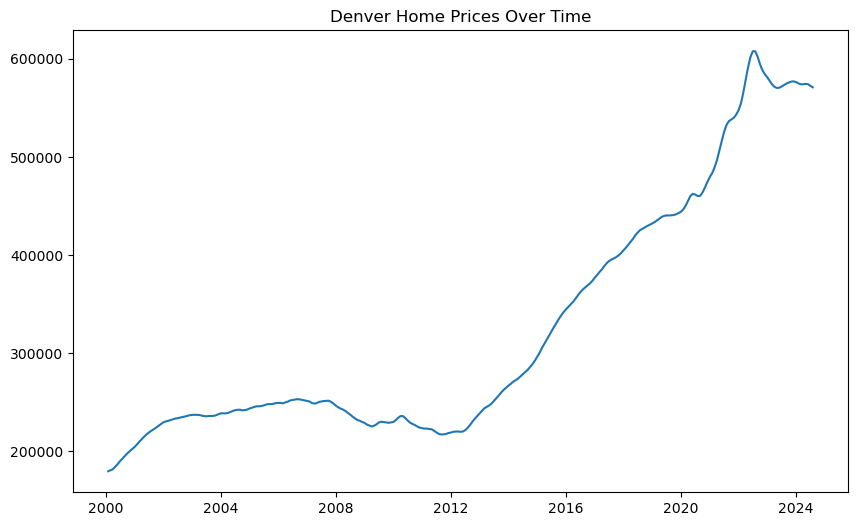

In [35]:

# Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(denver_cleaned_series)
plt.title('Denver Home Prices Over Time')
plt.show()

In [36]:
# ChatGPT - Differencing the series to make it stationary
# ARIMA requires stationary data, so we can difference the series to remove trends
denver_diff = denver_cleaned_series.diff().dropna()

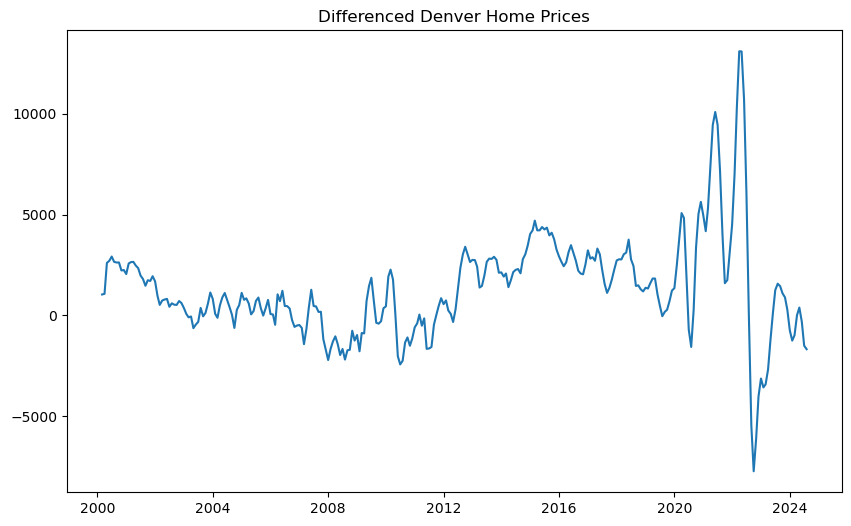

In [37]:
# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(denver_diff)
plt.title('Differenced Denver Home Prices')
plt.show()


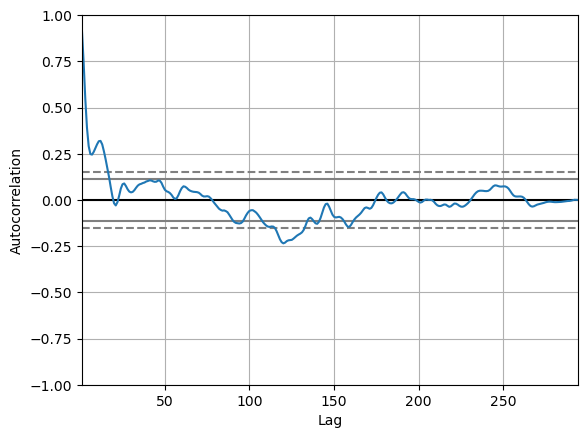

In [38]:
# Autocorrelation plot to understand lags
autocorrelation_plot(denver_diff)
plt.show()

In [39]:
# Fit the ARIMA model (p, d, q)
model = ARIMA(denver_cleaned_series, order=(1, 1, 1))  # (p, d, q) values can be tuned
model_fit = model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [40]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              HomeValue   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2704.952
Date:                Wed, 04 Sep 2024   AIC                           5415.904
Time:                        20:09:53   BIC                           5426.955
Sample:                    01-31-2000   HQIC                          5420.330
                         - 07-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9522      0.014     69.106      0.000       0.925       0.979
ma.L1         -0.9176      0.017    -52.742      0.000      -0.952      -0.884
sigma2      5.563e+06   1.01e-10   5.52e+16      0.0

In [41]:
# Forecast future values
forecast = model_fit.forecast(steps=24)  # Forecast the next 24 months
print(forecast)

2024-08-31    571044.058702
2024-09-30    571052.628454
2024-10-31    571060.788469
2024-11-30    571068.558337
2024-12-31    571075.956711
2025-01-31    571083.001354
2025-02-28    571089.709178
2025-03-31    571096.096287
2025-04-30    571102.178016
2025-05-31    571107.968964
2025-06-30    571113.483035
2025-07-31    571118.733468
2025-08-31    571123.732866
2025-09-30    571128.493233
2025-10-31    571133.025997
2025-11-30    571137.342040
2025-12-31    571141.451724
2026-01-31    571145.364916
2026-02-28    571149.091010
2026-03-31    571152.638952
2026-04-30    571156.017260
2026-05-31    571159.234043
2026-06-30    571162.297026
2026-07-31    571165.213561
Freq: ME, Name: predicted_mean, dtype: float64


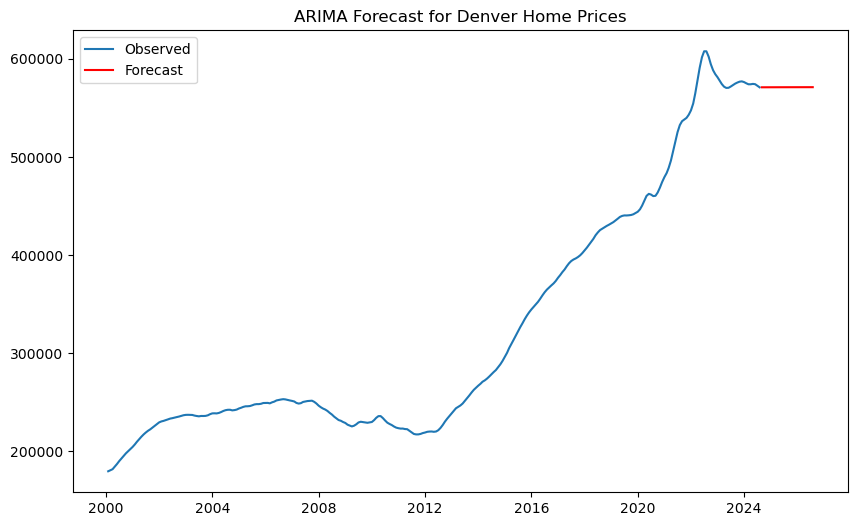

In [42]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(denver_cleaned_series, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast for Denver Home Prices')
plt.legend()
plt.show()

In [43]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [44]:
# Prepare the data for Prophet
df_prophet = denver_cleaned_series.reset_index()  # Reset index to have dates as a column
df_prophet.columns = ['ds', 'y']  # Prophet expects 'ds' (date) and 'y' (value)

In [45]:
# Initialize the Prophet model
model = Prophet()

In [46]:
# Fit the model on the data
model.fit(df_prophet)

20:10:15 - cmdstanpy - INFO - Chain [1] start processing
20:10:15 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
# Create future dates for forecasting
future = model.make_future_dataframe(periods=24, freq='M')  # 24 months into the future


/opt/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [48]:
# Predict future values
forecast = model.predict(future)

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


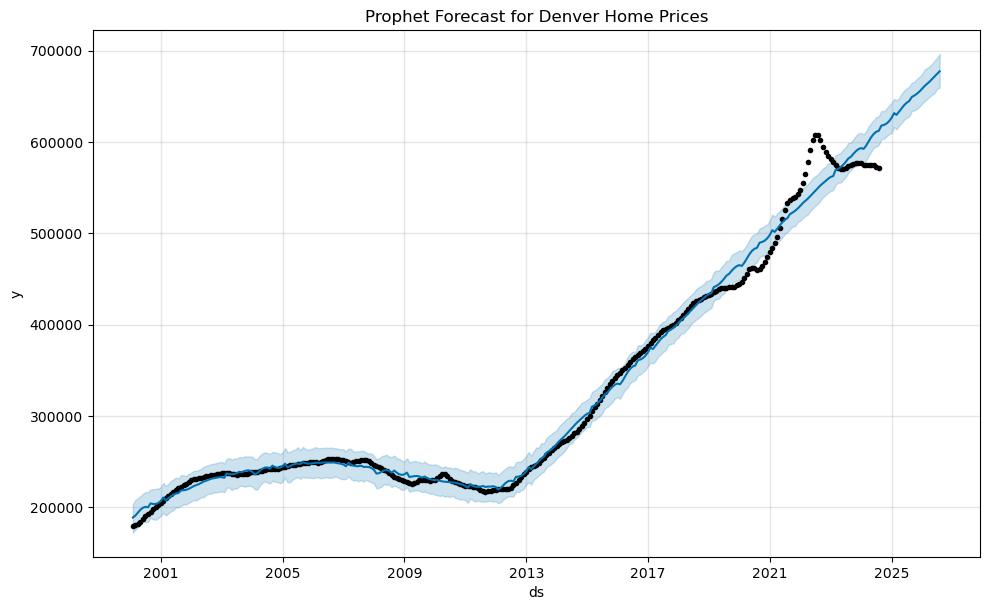

In [49]:
# Plot the forecast
model.plot(forecast)
plt.title('Prophet Forecast for Denver Home Prices')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

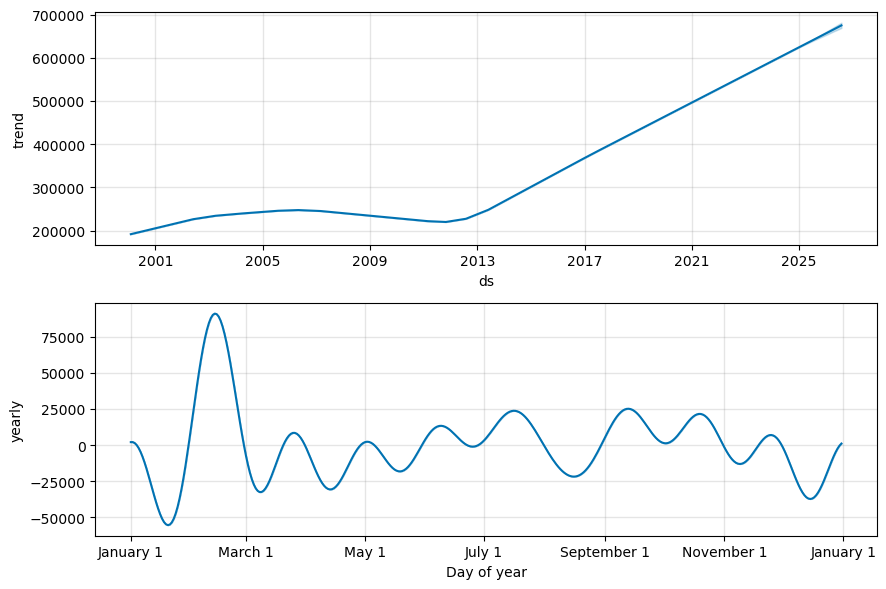

In [50]:
# Plot the components (trend, seasonality, etc.)
model.plot_components(forecast)
plt.show()

In [51]:
# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)  # Last 12 months of forecast

,ds,yhat,yhat_lower,yhat_upper
307,2025-08-31,649107.083872,633876.158986,664684.907773
308,2025-09-30,650666.756321,634452.858810,665707.505766
309,2025-10-31,652636.323419,635921.174213,668935.562148
310,2025-11-30,655057.175934,638343.001465,671038.276316
311,2025-12-31,657962.792302,641657.879843,674108.361259
312,2026-01-31,661076.956402,644528.876828,679095.721976
313,2026-02-28,663373.693137,646665.704779,680681.153298
314,2026-03-31,665829.297481,649281.753699,682685.775118
315,2026-04-30,668603.721184,651579.431087,685430.084910
316,2026-05-31,671602.546730,653579.682828,688919.398858


In [52]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 MB 1.9 MB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [54]:
# Prepare the data for LSTM
# Reshape the series into a DataFrame and convert it into a supervised learning problem
lstm_data = denver_cleaned_series.values.reshape(-1, 1)

In [56]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_data)

In [57]:
# Create sequences for LSTM (e.g., use the past 12 months to predict the next month)
def create_sequences(data, time_step=12):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [59]:
# Create the sequences
time_step = 12
X, y = create_sequences(scaled_data, time_step)

In [60]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

In [61]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [62]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [64]:
# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0521  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0397e-04 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.9442e-04
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9346e-04 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3296e-04 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9919e-04 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1089e-04 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.

In [65]:
# Predict on test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [66]:
# Inverse transform the predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [67]:
# Inverse transform the actual values back to original scale
y_train_actual = scaler.inverse_transform([y_train])
y_test_actual = scaler.inverse_transform([y_test])

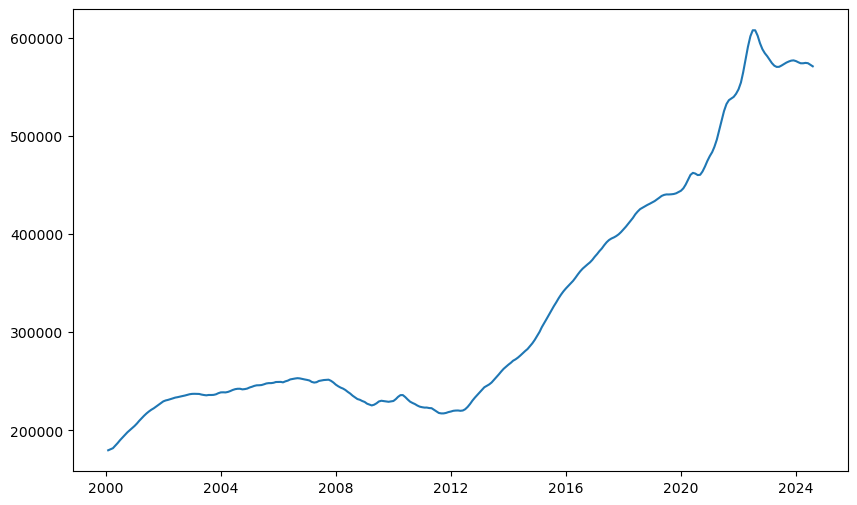

In [68]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(denver_cleaned_series.index, denver_cleaned_series.values, label="Original Data")
train_predictions_plot = np.empty_like(denver_cleaned_series.values)
train_predictions_plot[:] = np.nan
train_predictions_plot[time_step:len(train_predict) + time_step] = train_predict.flatten()

In [71]:
# Create empty arrays for storing predictions
train_predictions_plot = np.empty_like(denver_cleaned_series.values)
train_predictions_plot[:] = np.nan
train_predictions_plot[time_step:len(train_predict) + time_step] = train_predict.flatten()

test_predictions_plot = np.empty_like(denver_cleaned_series.values)
test_predictions_plot[:] = np.nan

# Correct the index range for test predictions
test_start_index = len(train_predict) + (time_step * 2)
test_end_index = test_start_index + len(test_predict)
test_predictions_plot[test_start_index:test_end_index] = test_predict.flatten()

ValueError: could not broadcast input array from shape (57,) into shape (46,)

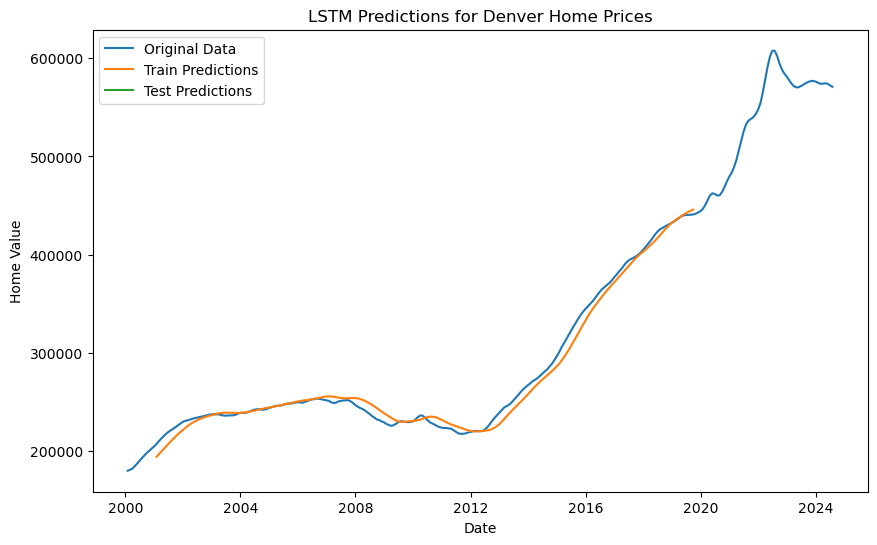

In [72]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(denver_cleaned_series.index, denver_cleaned_series.values, label="Original Data")
plt.plot(denver_cleaned_series.index, train_predictions_plot, label="Train Predictions")
plt.plot(denver_cleaned_series.index, test_predictions_plot, label="Test Predictions")
plt.title('LSTM Predictions for Denver Home Prices')
plt.xlabel('Date')
plt.ylabel('Home Value')
plt.legend()
plt.show()